In [366]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from astropy.wcs import WCS
import pandas as pd
import seaborn as sns
from scipy.ndimage import rotate
from reproject import reproject_interp
import matplotlib.patches as mpatches
from photutils.aperture import CircularAperture, CircularAnnulus, EllipticalAnnulus, EllipticalAperture
import math
from scipy.stats import bootstrap



os.chdir('/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns')
from isochrone_preprocessing_fns import *
from photmetry_catalog_preprocessing_fn import *
from plotting_fns import *
from map_analysis import *


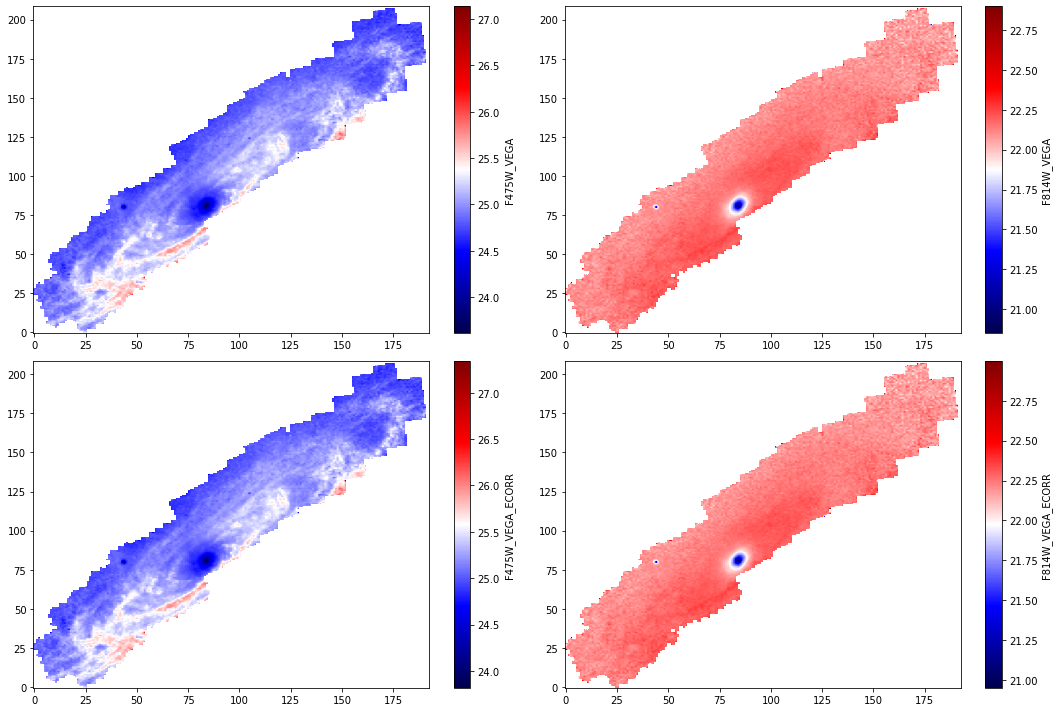

In [6]:
hdu = fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits')

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

extname_list = ['F475W_VEGA','F814W_VEGA', 'F475W_VEGA_ECORR', 'F814W_VEGA_ECORR']

# Plot the high_res_data
im0 = axs[0,0].imshow(hdu[extname_list[0]].data, cmap='seismic', aspect='auto', origin='lower')
# axs[0,0].set_title('M31 (PHAT and PHAST catalog)')
cbar0 = plt.colorbar(im0, ax=axs[0,0])
cbar0.set_label(f'{extname_list[0]}')
# contour_levels = np.nanpercentile(hdu[extname_list[0]], [5, 25, 50, 75, 95, 99])
# axs[0,0].contour(hdu[extname_list[0]], levels=contour_levels, colors='black')

# ax1
im1 = axs[0,1].imshow(hdu[extname_list[1]].data, cmap='seismic', aspect='auto', origin='lower')
# axs[0,1].set_title('Drain Dust Mass Map')
# axs[0,1].contour(hdu[extname_list[0]], levels=contour_levels, colors='black')
cbar1 = plt.colorbar(im1, ax=axs[0,1])
cbar1.set_label(f'{extname_list[1]}')

# ax2
im2 = axs[1,0].imshow(hdu[extname_list[2]].data, cmap='seismic', aspect='auto', origin='lower')
# axs[1,0].contour(hdu[extname_list[0]], levels=contour_levels, colors='black')
# axs[1,0].set_title('Original Draine Dust Map')
# axs[1,0].invert_yaxis()
cbar2 = plt.colorbar(im2, ax=axs[1,0])
cbar2.set_label(f'{extname_list[2]}')


# ax3
im3 = axs[1,1].imshow(hdu[extname_list[3]].data, cmap='seismic', aspect='auto', origin='lower')
# axs[1,0].contour(hdu[extname_list[0]], levels=contour_levels, colors='black')
# axs[1,1].set_title('Original Draine Dust Map')
# axs[1,0].invert_yaxis()
cbar2 = plt.colorbar(im3, ax=axs[1,1])
cbar2.set_label(f'{extname_list[3]}')
plt.tight_layout()
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/mag_with_wo_forground_Av.pdf')
plt.show()

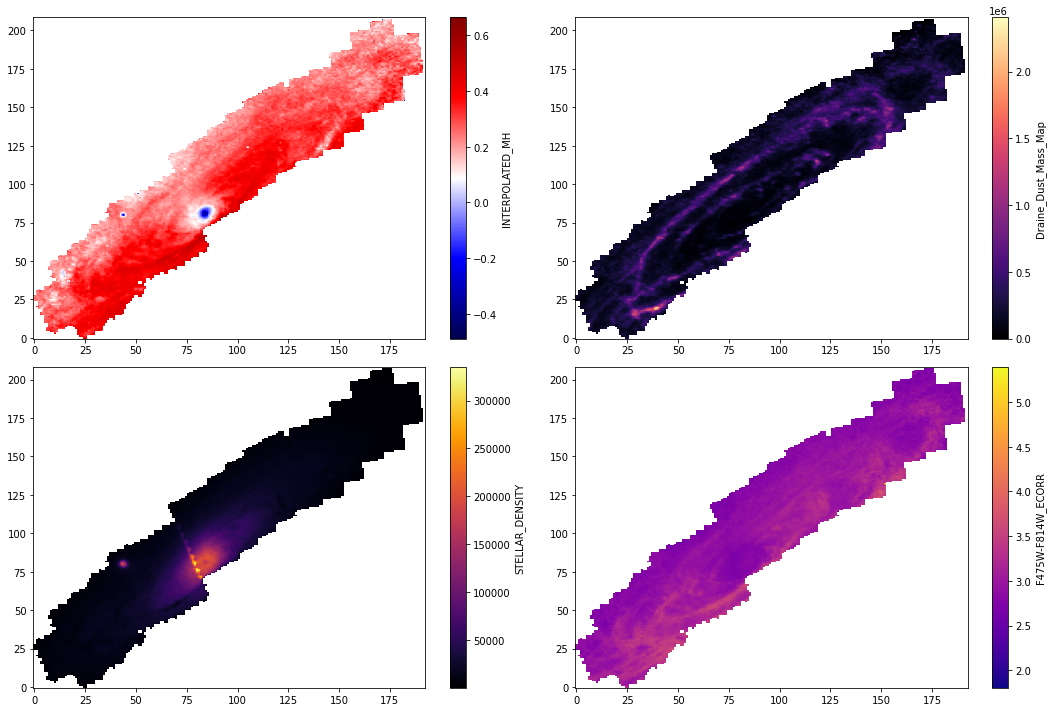

In [291]:
hdu = fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits')

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

extname_list = ['INTERPOLATED_MH','Draine_Dust_Mass_Map', 'STELLAR_DENSITY', 'F475W-F814W_ECORR']

# Plot the high_res_data
im0 = axs[0,0].imshow(hdu[extname_list[0]].data, cmap='seismic', aspect='auto', origin='lower')
# axs[0,0].set_title('M31 (PHAT and PHAST catalog)')
cbar0 = plt.colorbar(im0, ax=axs[0,0])
cbar0.set_label(f'{extname_list[0]}')
# contour_levels = np.nanpercentile(hdu[extname_list[0]], [5, 25, 50, 75, 95, 99])
# axs[0,0].contour(hdu[extname_list[0]], levels=contour_levels, colors='black')

# ax1
im1 = axs[0,1].imshow(hdu[extname_list[1]].data, cmap='magma', aspect='auto', origin='lower')
# axs[0,1].set_title('Drain Dust Mass Map')
# axs[0,1].contour(hdu[extname_list[0]], levels=contour_levels, colors='black')
cbar1 = plt.colorbar(im1, ax=axs[0,1])
cbar1.set_label(f'{extname_list[1]}')

# ax2
im2 = axs[1,0].imshow(hdu[extname_list[2]].data, cmap='inferno', aspect='auto', origin='lower')
# axs[1,0].contour(hdu[extname_list[0]], levels=contour_levels, colors='black')
# axs[1,0].set_title('Original Draine Dust Map')
# axs[1,0].invert_yaxis()
cbar2 = plt.colorbar(im2, ax=axs[1,0])
cbar2.set_label(f'{extname_list[2]}')


# ax3
im3 = axs[1,1].imshow(hdu[extname_list[3]].data, cmap='plasma', aspect='auto', origin='lower')
# axs[1,0].contour(hdu[extname_list[0]], levels=contour_levels, colors='black')
# axs[1,1].set_title('Original Draine Dust Map')
# axs[1,0].invert_yaxis()
cbar2 = plt.colorbar(im3, ax=axs[1,1])
cbar2.set_label(f'{extname_list[3]}')
plt.tight_layout()
# plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/random_subplot_set0.jpeg')

plt.show()

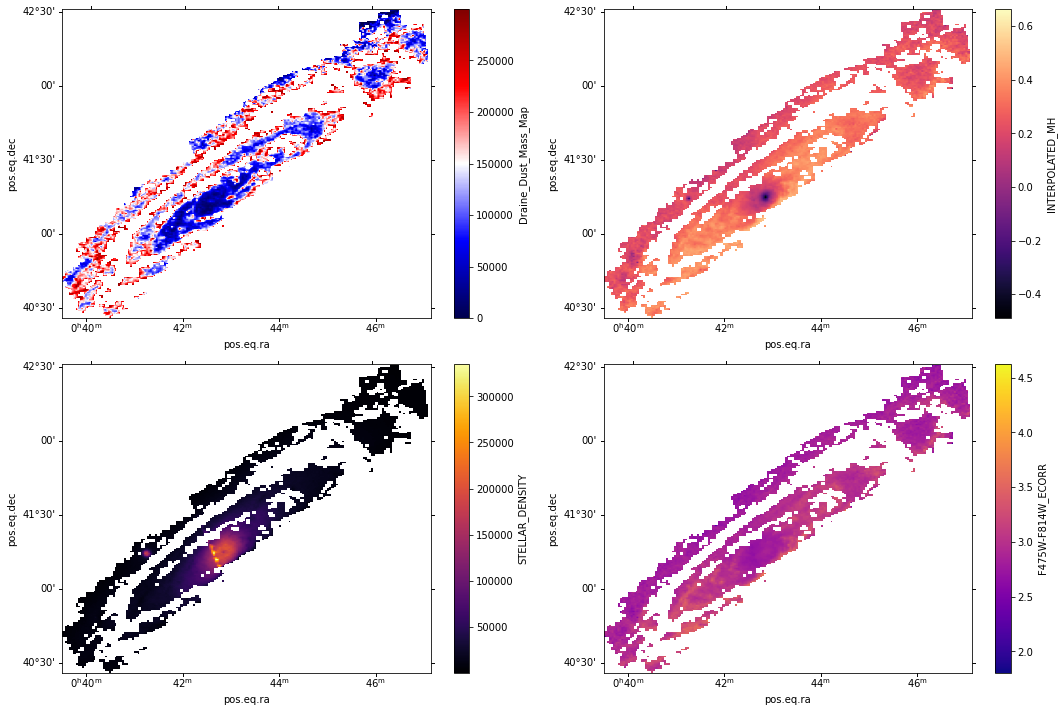

In [214]:
# Exclude high dust mass areas
# hdu = fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits')

def apply_mask_to_map(hdu, map_extname, mask_extname, mask_value2exclude_threshold):
    """
    Apply a mask to a map

    Parameters
    ----------
    hdu : astropy.io.fits.hdu.hdulist.HDUList
        HDU list object
    map_extname : str
        Name of the map to be masked
    mask_extname : str
        Name of the mask to be applied
    mask_value2exclude_threshold : float
        Mask value to be excluded


    Returns
    -------
    masked_map : np.ma.masked_array
        Masked map
    
    """

    # Map of mask being masked
    map_data = hdu[map_extname].data

    # Map of mask being applied
    mask_map = hdu[mask_extname].data

    masked_map = np.ma.masked_array(map_data, (mask_map >= mask_value2exclude_threshold))
    # map_data1 = np.ma.masked_array(map_data1, (draine_dust_mass_map >= max_dust_mass_value))
    # map_data2 = np.ma.masked_array(map_data2, (draine_dust_mass_map >= max_dust_mass_value))
    # map_data3 = np.ma.masked_array(map_data3, (draine_dust_mass_map >= max_dust_mass_value))

    # hdu.close()
    
    return masked_map
    




with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
    extname_list = ['Draine_Dust_Mass_Map', 'INTERPOLATED_MH', 'STELLAR_DENSITY', 'F475W-F814W_ECORR']

    # map_data0 = hdu[extname_list[0]].data
    # map_data1 = hdu[extname_list[1]].data
    # map_data2 = hdu[extname_list[2]].data
    # map_data3 = hdu[extname_list[3]].data

    # draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data

    # max_dust_mass_value = 3e5

    # map_data0 = np.ma.masked_array(map_data0, (draine_dust_mass_map >= max_dust_mass_value))
    # map_data1 = np.ma.masked_array(map_data1, (draine_dust_mass_map >= max_dust_mass_value))
    # map_data2 = np.ma.masked_array(map_data2, (draine_dust_mass_map >= max_dust_mass_value))
    # map_data3 = np.ma.masked_array(map_data3, (draine_dust_mass_map >= max_dust_mass_value))

    map_data0 = apply_mask_to_map(hdu, extname_list[0], mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=3e5)
    map_data1 = apply_mask_to_map(hdu, extname_list[1], mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=3e5)
    map_data2 = apply_mask_to_map(hdu, extname_list[2], mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=3e5)
    map_data3 = apply_mask_to_map(hdu, extname_list[3], mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=3e5)

    
    fig, axs = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={'projection': WCS(hdu[0].header)})
    # Plot the high_res_data
    im0 = axs[0,0].imshow(map_data0, cmap='seismic', aspect='auto', origin='lower')
    # axs[0,0].set_title('M31 (PHAT and PHAST catalog)')
    cbar0 = plt.colorbar(im0, ax=axs[0,0])
    cbar0.set_label(f'{extname_list[0]}')
    # contour_levels = np.nanpercentile(map_data0, [5, 25, 50, 75, 95, 99])
    # axs[0,0].contour(map_data0, levels=contour_levels, colors='black')

    # ax1
    im1 = axs[0,1].imshow(map_data1, cmap='magma', aspect='auto', origin='lower')
    # axs[0,1].set_title('Drain Dust Mass Map')
    # axs[0,1].contour(map_data0, levels=contour_levels, colors='black')
    cbar1 = plt.colorbar(im1, ax=axs[0,1])
    cbar1.set_label(f'{extname_list[1]}')

    # ax2
    im2 = axs[1,0].imshow(map_data2, cmap='inferno', aspect='auto', origin='lower')
    # axs[1,0].contour(map_data0, levels=contour_levels, colors='black')
    # axs[1,0].set_title('Original Draine Dust Map')
    # axs[1,0].invert_yaxis()
    cbar2 = plt.colorbar(im2, ax=axs[1,0])
    cbar2.set_label(f'{extname_list[2]}')


    # ax3
    im3 = axs[1,1].imshow(map_data3, cmap='plasma', aspect='auto', origin='lower')
    # im3 = axs[1,1].scatter(map_data3, map_data2)
    # axs[1,0].contour(map_data0, levels=contour_levels, colors='black')
    # axs[1,1].set_title('Original Draine Dust Map')
    # axs[1,0].invert_yaxis()
    cbar2 = plt.colorbar(im3, ax=axs[1,1])
    cbar2.set_label(f'{extname_list[3]}')
    plt.tight_layout()
    # plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/random_subplot_set0.jpeg')

    plt.show()



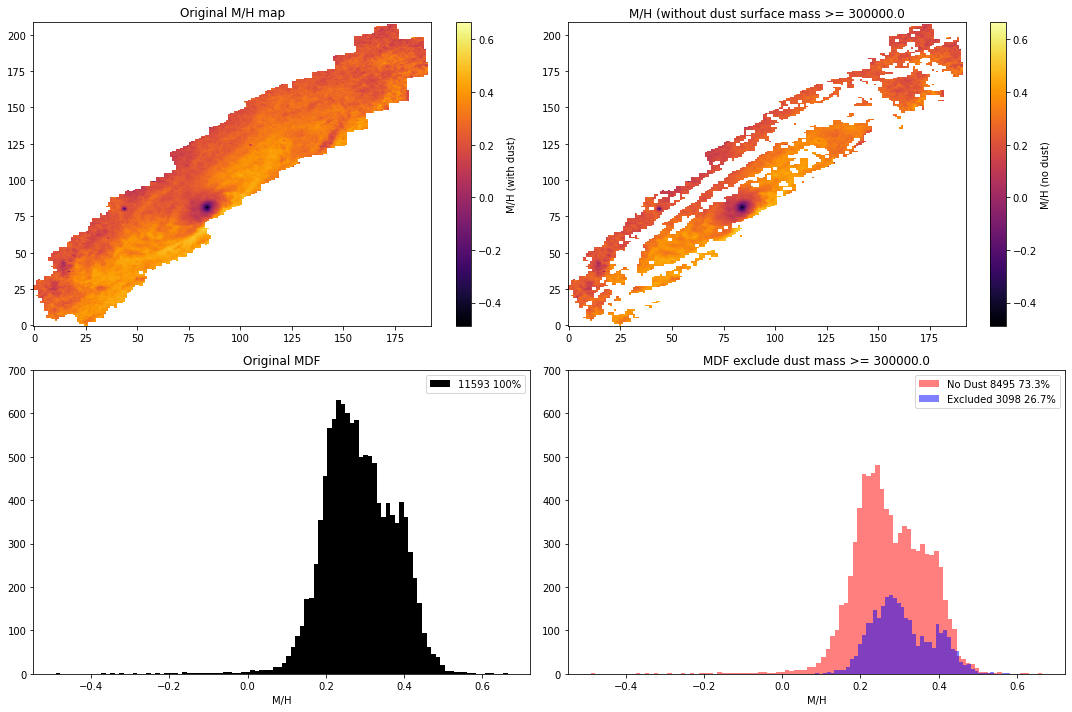

In [215]:
with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
    mh_map = hdu['INTERPOLATED_MH'].data
    draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
    max_dust_mass_value = 3e5

    # Mask the high dust mass areas
    mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
    mh_map_no_dust = mh_map_no_dust.filled()
    # mh_map_no_dust = np.fill(mh_map_no_dust, np.nan, inplace=True)

    # The excluded dust mass values
    excluded_dust_mass = mh_map[draine_dust_mass_map >= max_dust_mass_value]



    # plot
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    im0 = axs[0,0].imshow(mh_map, cmap='inferno', aspect='auto', origin='lower')
    axs[0,0].set_title('Original M/H map')
    cbar0 = plt.colorbar(im0, ax=axs[0,0])
    cbar0.set_label('M/H (with dust)')

    im1 = axs[0,1].imshow(mh_map_no_dust, cmap='inferno', aspect='auto', origin='lower')
    axs[0,1].set_title(f'M/H (without dust surface mass >= {max_dust_mass_value}')
    cbar1 = plt.colorbar(im1, ax=axs[0,1])
    cbar1.set_label('M/H (no dust)')


    mh_map_flat = mh_map.flatten()
    mh_map_flat = mh_map_flat[~np.isnan(mh_map_flat)]
    axs[1,0].hist(mh_map.flatten(), bins=100, color='black', label=f'{len(mh_map_flat)} 100%')
    axs[1,0].set_title('Original MDF')
    axs[1,0].legend()
    axs[1,0].set_xlabel('M/H')
    axs[1,0].set_ylim(0,700)

    mh_map_no_dust_flat = mh_map_no_dust.flatten()
    mh_map_no_dust_flat = mh_map_no_dust_flat[~np.isnan(mh_map_no_dust_flat)]
    excluded_dust_mass = excluded_dust_mass.flatten()
    

    axs[1,1].hist(mh_map_no_dust_flat, bins=100, color='red', alpha=0.5, histtype='stepfilled', label=f'No Dust {len(mh_map_no_dust_flat)} {np.round(len(mh_map_no_dust_flat)/len(mh_map_flat)*100,1)}%')
    axs[1,1].hist(excluded_dust_mass, bins=50, color='blue', alpha=0.5, histtype='stepfilled', label=f'Excluded {len(excluded_dust_mass)} {np.round(len(excluded_dust_mass)/len(mh_map_flat)*100,1)}%')
    axs[1,1].set_title(f'MDF exclude dust mass >= {max_dust_mass_value}')
    axs[1,1].set_xlabel('M/H')
    axs[1,1].set_ylim(0,700)
    axs[1,1].legend()

    plt.tight_layout()
    plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_mh_map_exclude.pdf')
    plt.show()

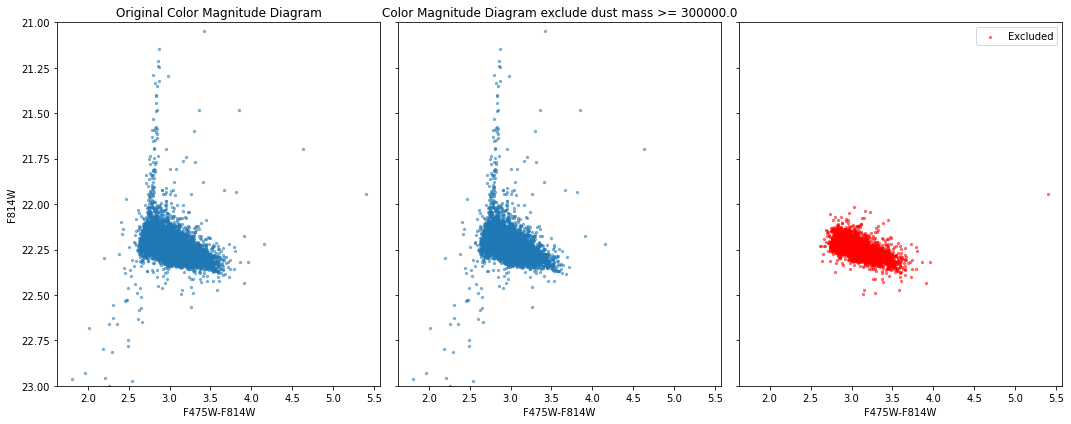

In [216]:
with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
    f814w_map = hdu['F814W_VEGA_ECORR'].data
    f475w_f814w_map = hdu['F475W-F814W_ECORR'].data
    draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
    max_dust_mass_value = 3e5


    # Mask the high dust mass areas
    f814w_map_no_dust = np.ma.masked_array(f814w_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
    f814w_map_no_dust = f814w_map_no_dust.filled()

    f475w_f814w_map_no_dust = np.ma.masked_array(f475w_f814w_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
    f475w_f814w_map_no_dust = f475w_f814w_map_no_dust.filled()

    # The excluded dust mass values
    excluded_f814w_map = f814w_map[draine_dust_mass_map >= max_dust_mass_value]
    excluded_f475w_f814w_map = f475w_f814w_map[draine_dust_mass_map >= max_dust_mass_value]


    # plot
    fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)

    axs[0].scatter(f475w_f814w_map, f814w_map, s=5, alpha=0.5)
    axs[0].set_title('Original Color Magnitude Diagram')
    axs[0].set_xlabel('F475W-F814W')
    axs[0].set_ylabel('F814W')
    axs[0].set_ylim(23, 21)


    axs[1].scatter(f475w_f814w_map_no_dust, f814w_map_no_dust, s=5, alpha=0.5, label='No Dust')
    axs[1].set_title(f'Color Magnitude Diagram exclude dust mass >= {max_dust_mass_value}')
    axs[1].set_xlabel('F475W-F814W')

    axs[2].scatter(excluded_f475w_f814w_map, excluded_f814w_map, s=5, alpha=0.5, color='red', label='Excluded')
    axs[2].set_xlabel('F475W-F814W')

    plt.tight_layout()
    plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/cmd_with_and_without_dust.pdf')
    plt.legend()

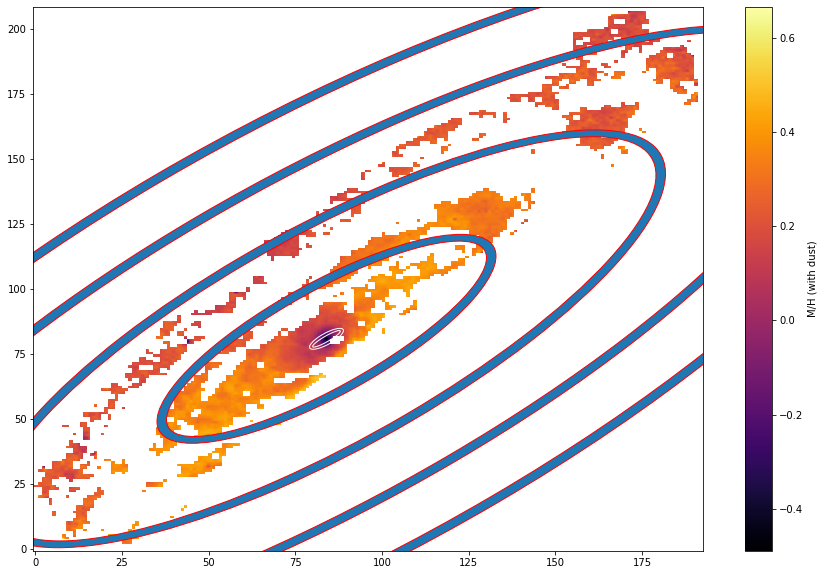

In [308]:
from matplotlib import patches

with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
    mh_map = hdu['INTERPOLATED_MH'].data
    draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
    max_dust_mass_value = 2e5
    # Mask the high dust mass areas
    mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
    mh_map_no_dust = mh_map_no_dust.filled()
    # mh_map_no_dust = np.fill(mh_map_no_dust, np.nan, inplace=True)

    # # The excluded dust mass values
    excluded_dust_mass = mh_map[draine_dust_mass_map >= max_dust_mass_value]

    fig, ax = plt.subplots(figsize=(15, 10))

    # im0 = plt.imshow(mh_map, cmap='inferno', aspect='auto', origin='lower')
    im0 = plt.imshow(mh_map_no_dust, cmap='inferno', aspect='auto', origin='lower')
    cbar0 = plt.colorbar(im0)
    cbar0.set_label('M/H (with dust)')

    ax.add_patch(patches.Annulus(xy=(84, 81), r=(60,20),  width=3, fill=True, edgecolor='red', angle=38.0))
    ax.add_patch(patches.Annulus(xy=(84, 81), r=(120,40), width=3, fill=True, edgecolor='red', angle=38.0))
    ax.add_patch(patches.Annulus(xy=(84, 81), r=(180,60), width=3, fill=True, edgecolor='red', angle=38.0))
    ax.add_patch(patches.Annulus(xy=(84, 81), r=(220,80), width=3, fill=True, edgecolor='red', angle=38.0))
    
    # central region patch
    ax.add_patch(patches.Annulus(xy=(84, 81), r=(6,2), width=1, fill=False, edgecolor='white', angle=38.0))
    plt.show()

In [290]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches


# def create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, array_shape):
#     y,x = np.ogrid[-center_y:array_shape[0]-center_y, -center_x:array_shape[1]-center_x]
#     mask = ((x*np.cos(angle) + y*np.sin(angle))**2/semi_major_axis**2 
#           + (y*np.cos(angle) - x*np.sin(angle))**2/semi_minor_axis**2) <= 1
#     return mask

# # Define the center of the ellipse and the semi-major and semi-minor axes
# center_x, center_y = 84, 81
# semi_major_axis, semi_minor_axis = 60, 20
# # semi_major_axis, semi_minor_axis = 120, 40

# # semi_major_axis, semi_minor_axis = 6, 2

# angle = np.deg2rad(38.0)  # Angle in radians

# # Create the elliptical mask
# mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map.shape)

# # Apply the mask to the mh_map array
# mh_map_masked = np.where(mask, mh_map_no_dust, np.nan)

# # Plot the masked array
# fig, ax = plt.subplots(figsize=(15, 10))
# im0 = plt.imshow(mh_map_masked, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5)
# cbar0 = plt.colorbar(im0)
# cbar0.set_label('M/H (with dust)')

# # Create a Patch as a proxy artist for the legend
# median_patch = mpatches.Patch(color='none', label=f'Median = {np.round(np.nanmedian(mh_map_masked), 3)} MH')
# ax.legend(handles=[median_patch])

# plt.show()

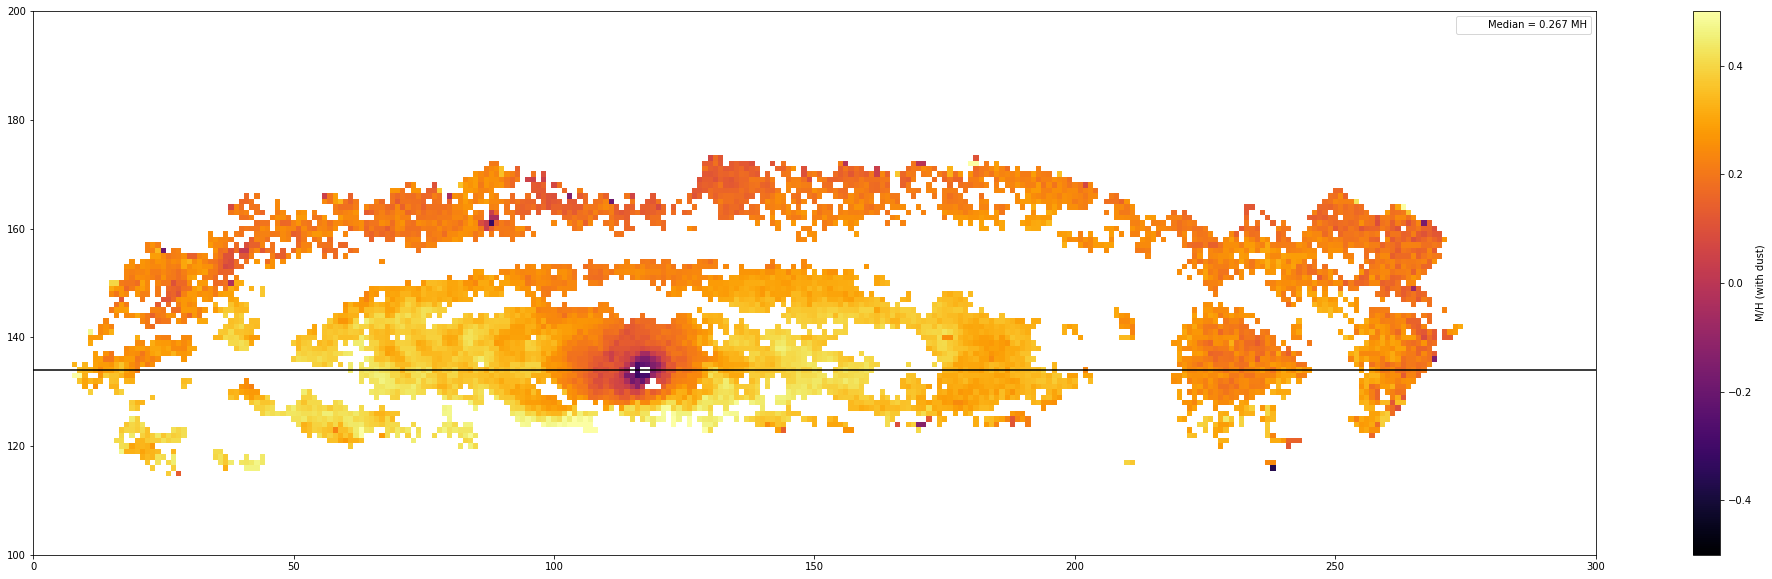

In [364]:
# from scipy.ndimage import rotate

def create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, array_shape, inner_radius, outer_radius):
    # x*=
    y,x = np.ogrid[-center_y:array_shape[0]-center_y, -center_x:array_shape[1]-center_x]
    ellipse = ((x*np.cos(angle) + y*np.sin(angle))**2/semi_major_axis**2 
          + (y*np.cos(angle) - x*np.sin(angle))**2/semi_minor_axis**2)
    mask = (ellipse >= inner_radius**2) & (ellipse <= outer_radius**2)
    return mask

# Define the inner and outer radii
center_x, center_y = 84, 81
semi_major_axis, semi_minor_axis = 180, 60
inner_radius, outer_radius = 0.01, 1.2
angle = np.deg2rad(38.0)  # Angle in radians 


# Create the elliptical mask
mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map.shape, inner_radius, outer_radius)

# Apply the mask to the mh_map array
mh_map_masked = np.where(mask, mh_map_no_dust, np.nan)

# Rotate the mh_map
mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)


# Plot the masked array
fig, ax = plt.subplots(figsize=(35, 10))
im0 = plt.imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5)
cbar0 = plt.colorbar(im0)
cbar0.set_label('M/H (with dust)')

# Create a Patch as a proxy artist for the legend
median_patch = mpatches.Patch(color='none', label=f'Median = {np.round(np.nanmedian(mh_map_masked), 3)} MH')
ax.legend(handles=[median_patch])
plt.hlines(134, 0, 300, color='black')
plt.ylim(100, 200)
plt.xlim(0, 300)

plt.show()

In [184]:
# iterate through the inner and outer radii a plot each individual plot

# ellip_median_list = []
# # Define the inner and outer radii
# center_x, center_y = 84, 81
# semi_major_axis, semi_minor_axis = 180, 60
# inner_radius, outer_radius = 0.01, 1.2
# angle = np.deg2rad(45.0)  # Angle in radians
# for i in np.linspace(0.1, 1.0, 10):
#     mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map.shape, i, i+0.1)
#     mh_map_masked = np.where(mask, mh_map, np.nan)
#     mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)
#     fig, ax = plt.subplots(figsize=(15, 10))
#     im0 = plt.imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5)
#     cbar0 = plt.colorbar(im0)
#     cbar0.set_label('M/H (with dust)')
#     plt.title(f'{i} - {i+0.1}')

#     # Create a Patch as a proxy artist for the legend
#     ellip_median = np.round(np.nanmedian(mh_map_masked), 3)
#     median_patch = mpatches.Patch(color='none', label=f'Median = {ellip_median} MH')
#     ax.legend(handles=[median_patch])
#     plt.hlines(134, 0, 300, color='black')


#     ellip_median_list.append(ellip_median)

#     plt.show()

In [78]:
# Load the FITS file
with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
    header = hdu[0].header

    # Extract the WCS
    wcs = WCS(header)

    # Calculate the scale in degrees per pixel
    scale_deg_per_pix = wcs.pixel_scale_matrix[0,0] * np.sqrt(1 - wcs.pixel_scale_matrix[0,1]**2)
    scale_deg_per_pix = np.abs(scale_deg_per_pix)  # Take the absolute value to ensure the scale is positive

    # Assume a distance to the object in kpc
    distance_kpc = 778  # Replace with the actual distance

    # Convert the scale to kpc per pixel
    scale_kpc_per_pix = scale_deg_per_pix * np.pi / 180 * distance_kpc
    print(f"Scale: {scale_deg_per_pix} deg/pix = {scale_kpc_per_pix} kpc/pix")

    print(wcs)

    center_x_pix = wcs.wcs.crpix[0]
    center_y_pix = wcs.wcs.crpix[1]

    center_x_ra = wcs.wcs.crval[0]
    center_y_dec = wcs.wcs.crval[1]

    print(f"Center pixel: {center_x_pix}, {center_y_pix}")
    print(f"Center RA, Dec: {center_x_ra}, {center_y_dec}")

Scale: 0.0075321908814672 deg/pix = 0.10227707093929075 kpc/pix
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 10.79 41.13 
CRPIX : 93.0 70.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : 0.0075321908814672 0.01 
NAXIS : 0  0
Center pixel: 93.0, 70.0
Center RA, Dec: 10.79, 41.13


In [104]:
inner_radius*scale_kpc_per_pix

0.5113853546964537

In [105]:
outer_radius*scale_kpc_per_pix

2.8637579863001412

## Ellipse subplot with dust included

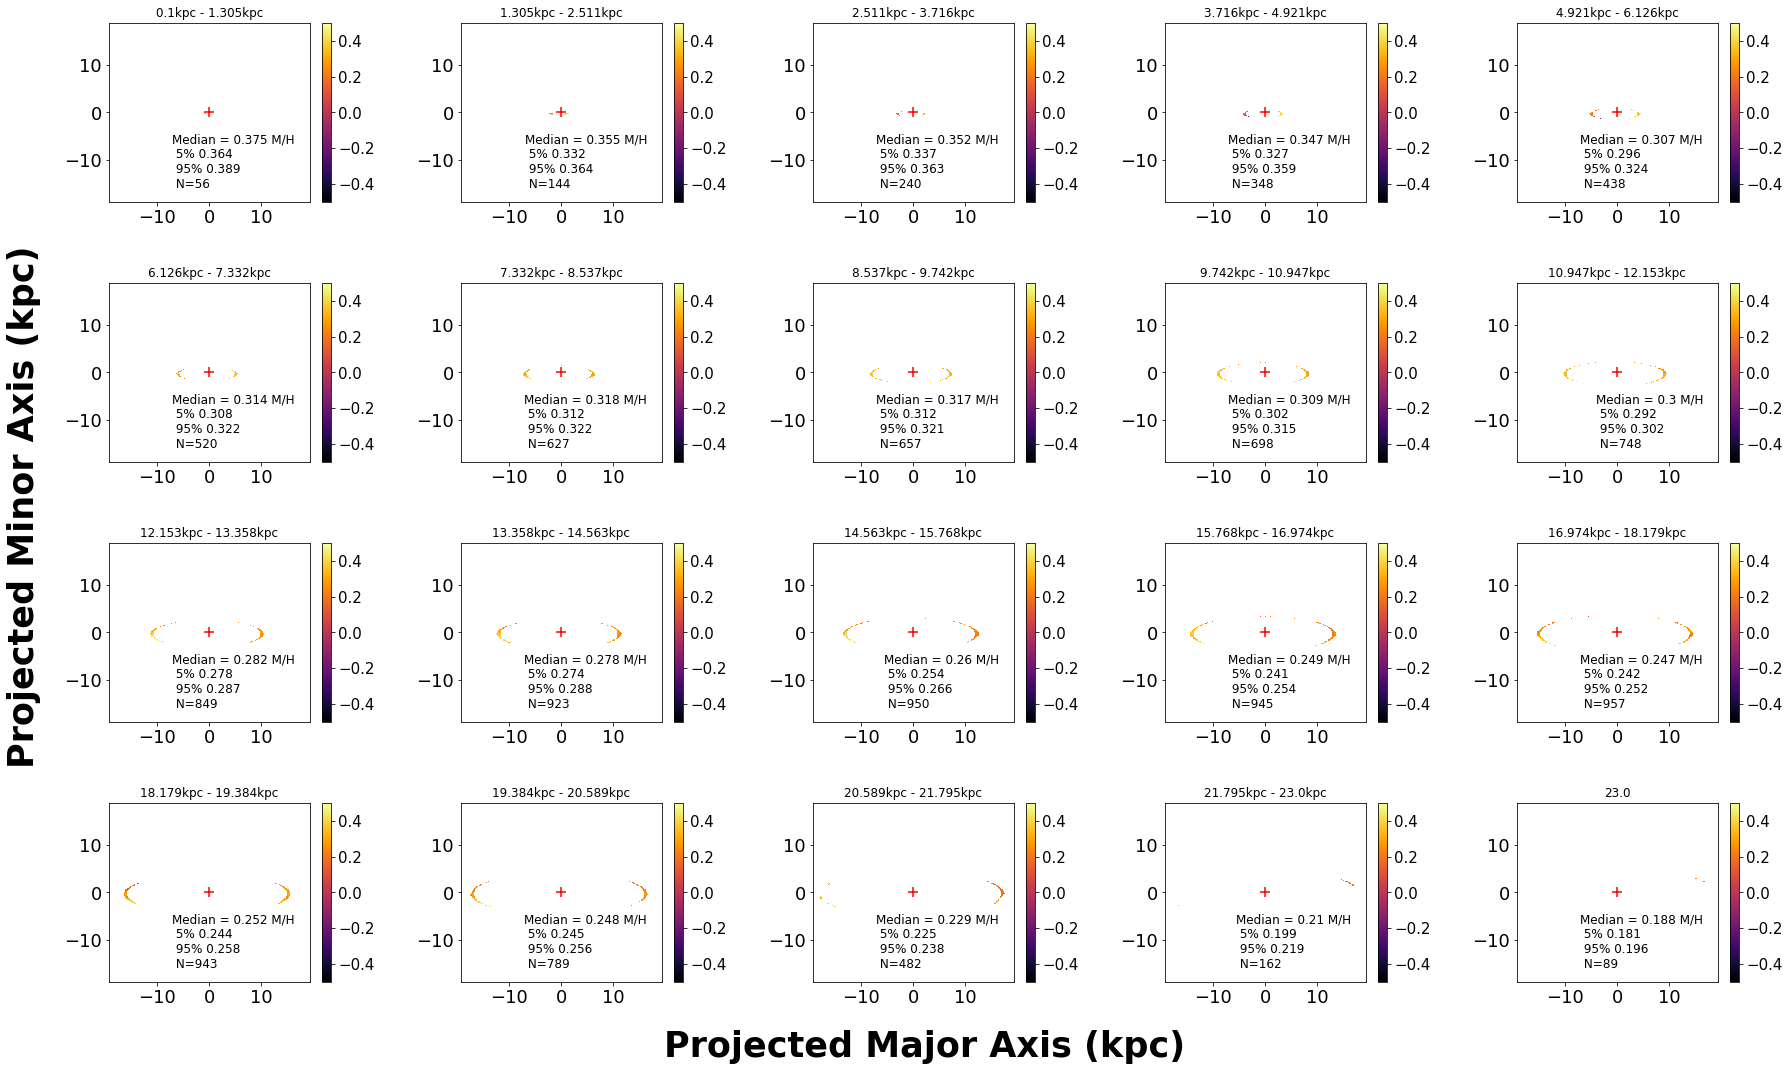

In [443]:
with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
    mh_map = hdu['INTERPOLATED_MH'].data
    draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
    max_dust_mass_value = 2e5
    # Mask the high dust mass areas
    mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
    mh_map_no_dust = mh_map_no_dust.filled()

    # The excluded dust mass values
    excluded_dust_mass_map = mh_map[draine_dust_mass_map >= max_dust_mass_value]

    # mh_map_no_dust = apply_mask_to_map(hdu, 'INTERPOLATED_MH', mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=3e5)

# Define the inner and outer radii
# center_x, center_y = 84, 81 #? These values are more in the center than the WCS center pixels?
center_x, center_y = 95, 100 #? These values are more in the center than the WCS center pixels?


# center_x, center_y = center_x_pix, center_y_pix
semi_major_axis, semi_minor_axis = 16.5, 60
# semi_major_axis, semi_minor_axis = 16.5/3, 60/3
# i = np.arccos(semi_major_axis/semi_minor_axis)
# inner_radius, outer_radius = 0.0, 3.0
inner_radius, outer_radius = 0.1, 23 # radius of ellip in pixels
# inner_radius, outer_radius = 0.1, 50 # radius of ellip in pixels

# angle = np.deg2rad(i)  # Angle in radians
angle = np.deg2rad(-45)  # Angle in radians

# runs = np.linspace(inner_radius, outer_radius, 15)
runs = np.linspace(inner_radius*scale_kpc_per_pix, outer_radius*scale_kpc_per_pix, 20)
delta_runs = runs[1]-runs[0]
num_runs = len(runs)

# Calculate the number of rows and columns for the subplots
cols = 5  # You can change this to fit your needs
rows = math.ceil(num_runs / cols)
fig, axs = plt.subplots(rows, cols, figsize=(25, 15))  # Adjust the figure size as needed
axs = axs.ravel()  # Flatten the array of axes

ellip_median_list = []
ellip_qlow_list = []
ellip_qhigh_list = []
for idx, i in enumerate(runs):
    mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map.shape, i, i+delta_runs)
    mh_map_masked = np.where(mask, mh_map, np.nan)

    # Exclude dust mass value
    # mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map_no_dust.shape, i, i+delta_runs)
    # mh_map_masked = np.where(mask, mh_map_no_dust, np.nan)

    # Rotate the mh_map
    mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)

    # Calculate the maximum extent from the center in both directions
    max_extent_x = max(center_x, mh_map_rotated.shape[1] - center_x) * scale_kpc_per_pix
    max_extent_y = max(center_y, mh_map_rotated.shape[0] - center_y) * scale_kpc_per_pix
    
    # Calculate the coordinates of the x and y axes in kpc/pix
    y_coords = np.arange(mh_map_rotated.shape[0]) * scale_kpc_per_pix
    x_coords = np.arange(mh_map_rotated.shape[1]) * scale_kpc_per_pix

    im0 = axs[idx].imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5, extent=[-max_extent_x, max_extent_x, -max_extent_y, max_extent_y])
    fig.colorbar(im0, ax=axs[idx]).ax.tick_params(labelsize=15)
    if i == runs.max():
        axs[idx].set_title(f'{np.round(runs.max()/scale_kpc_per_pix, 3)}')
    else:
        axs[idx].set_title(f'{np.round(i/scale_kpc_per_pix, 3)}kpc - {np.round((i+delta_runs)/scale_kpc_per_pix, 3)}kpc')

    # calculate the median and 5% and 95% convidence intervals
    ellip_median = np.round(np.nanmedian(mh_map_masked), 3)
    # ellip_low = np.round(np.nanpercentile(mh_map_masked, 5), 3)
    # ellip_high = np.round(np.nanpercentile(mh_map_masked, 95), 3)

    # bootstrapping to get interval confidence
    data_filtered = mh_map_rotated[~np.isnan(mh_map_rotated)].flatten()
    bootstrap_results = bootstrap(data=(data_filtered,), statistic=np.nanmedian, n_resamples=9999, method='percentile', confidence_level=0.95, random_state=42)
    ellip_low = bootstrap_results.confidence_interval.low
    ellip_high = bootstrap_results.confidence_interval.high

    # Create a Patch as a proxy artist for the legend
    median_patch = mpatches.Patch(color='none', label=f'Median = {np.round(ellip_median, 3)} M/H \n 5% {np.round(ellip_low, 3)} \n 95% {np.round(ellip_high, 3)} \n N={np.count_nonzero(~np.isnan(mh_map_masked))}')
    axs[idx].legend(handles=[median_patch], loc='lower right', frameon=False, fontsize=12)
    # axs[idx].hlines(134, 0, 300, color='black')

    ellip_median_list.append(ellip_median)
    ellip_qlow_list.append(ellip_low)
    ellip_qhigh_list.append(ellip_high)

    # axs[idx].scatter(center_x_pix, center_y_pix, color='red', s=10, marker='x')
    axs[idx].scatter(0, 0, marker='+', color='red', s=100)
    axs[idx].tick_params(axis='both', which='major', labelsize=18)  # Adjust 'labelsize' as needed
    axs[idx].tick_params(axis='both', which='minor', labelsize=15)


# Remove unused subplots
for idx in range(num_runs, rows*cols):
    fig.delaxes(axs[idx])

# Set a common x and y label for all subplots
fig.text(0.5, 0.00, 'Projected Major Axis (kpc)', ha='center', va='center', fontsize=35, weight='bold')
fig.text(0.0, 0.5, 'Projected Minor Axis (kpc)', ha='center', va='center', rotation='vertical', fontsize=35, weight='bold')


# fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.05) 
plt.tight_layout(pad=4.0)
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/MH_gradient_ellipse.jpeg', bbox_inches='tight')
plt.show()

In [409]:
# mh_map_rotated[~np.isnan(mh_map_rotated)].flatten()

In [410]:
# data_filtered = mh_map_rotated[~np.isnan(mh_map_rotated)].flatten()


# bootstrap_results = bootstrap(data=(data_filtered,), statistic=np.nanmedian, n_resamples=9999, method='percentile', confidence_level=0.95, random_state=42)
# bootstrap_results

In [411]:
# bootstrap_results.confidence_interval.low

In [412]:
# proj_semimajor_axis = np.linspace(x_coords.min(), x_coords.max(), len(runs))
# proj_semimajor_axis

In [413]:
# import numpy as np
# fig, axs = plt.subplots(1, 1, figsize=(15, 10))  # Adjust the figure size as needed

# plt.scatter(runs/scale_kpc_per_pix, ellip_median_list)
# ellip_median_array = np.array(ellip_median_list)
# ellip_q25_array = np.array(ellip_q25_list)
# ellip_q75_array = np.array(ellip_q75_list)
# plt.errorbar(runs/scale_kpc_per_pix, ellip_median_list, yerr=(ellip_median_array - ellip_q25_array, ellip_q75_array - ellip_median_array), fmt='o')
# plt.xlabel('')

# # Fit a linear regression line
# slope, intercept = np.polyfit(runs/scale_kpc_per_pix, ellip_median_list, 1)
# fit_line = slope * runs/scale_kpc_per_pix + intercept
# plt.plot(runs/scale_kpc_per_pix, fit_line, color='red', label=f'Slope: {np.round(slope, 3)}dex/kpc \n y-intercept: {np.round(intercept, 3)}\nGregersen et al 2015: -0.020dex/kpc')
# # plt.legend()

# # Shaded region from 0 to 4.45 kpc (1/2 Reff)
# plt.axvspan(0, 4, color='gray', alpha=0.5, label='G15 incomplete RGB data at high M/H') # Gregersen et al 2015 - where completeness become incomplete at high metallicity
# plt.vlines(4.45, ymin=0, ymax=1, color='black', linestyle='--', label='1/2 Reff')
# plt.ylim(0, 0.7)

# plt.xlabel('Projected Major Axis (kpc)')
# plt.ylabel('M/H')
# plt.legend()
# plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_mh_gradient.jpeg')
# plt.show()


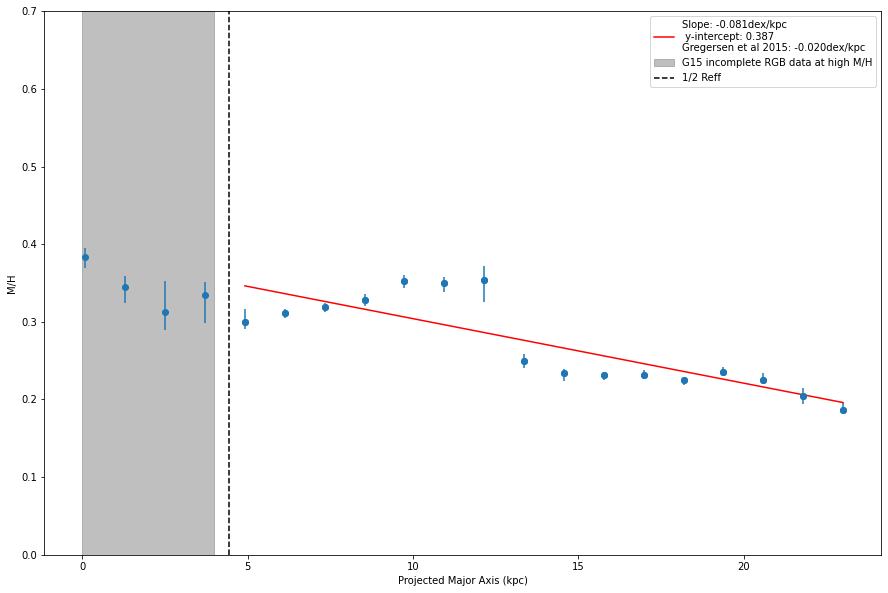

In [414]:
import numpy as np
fig, axs = plt.subplots(1, 1, figsize=(15, 10))  # Adjust the figure size as needed

plt.scatter(runs[4:]/scale_kpc_per_pix, ellip_median_list[4:])
ellip_median_array = np.array(ellip_median_list)
ellip_q25_array = np.array(ellip_qlow_list)
ellip_q75_array = np.array(ellip_qhigh_list)
plt.errorbar(runs/scale_kpc_per_pix, ellip_median_list, yerr=(ellip_median_array - ellip_q25_array, ellip_q75_array - ellip_median_array), fmt='o')
plt.xlabel('')

# Fit a linear regression line
slope, intercept = np.polyfit(runs[4:], ellip_median_list[4:], 1)
fit_line = slope * runs[4:] + intercept
plt.plot(runs[4:]/scale_kpc_per_pix, fit_line, color='red', label=f'Slope: {np.round(slope, 3)}dex/kpc \n y-intercept: {np.round(intercept, 3)}\nGregersen et al 2015: -0.020dex/kpc')
# plt.legend()

# Shaded region from 0 to 4.45 kpc (1/2 Reff)
plt.axvspan(0, 4, color='gray', alpha=0.5, label='G15 incomplete RGB data at high M/H') # Gregersen et al 2015 - where completeness become incomplete at high metallicity
plt.vlines(4.45, ymin=0, ymax=1, color='black', linestyle='--', label='1/2 Reff')
plt.ylim(0, 0.7)

plt.xlabel('Projected Major Axis (kpc)')
plt.ylabel('M/H')
plt.legend()

plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_mh_gradient.jpeg')
plt.show()


## Ellipse subplot with dust mass excluded (>3e5 dust surafce mass density)

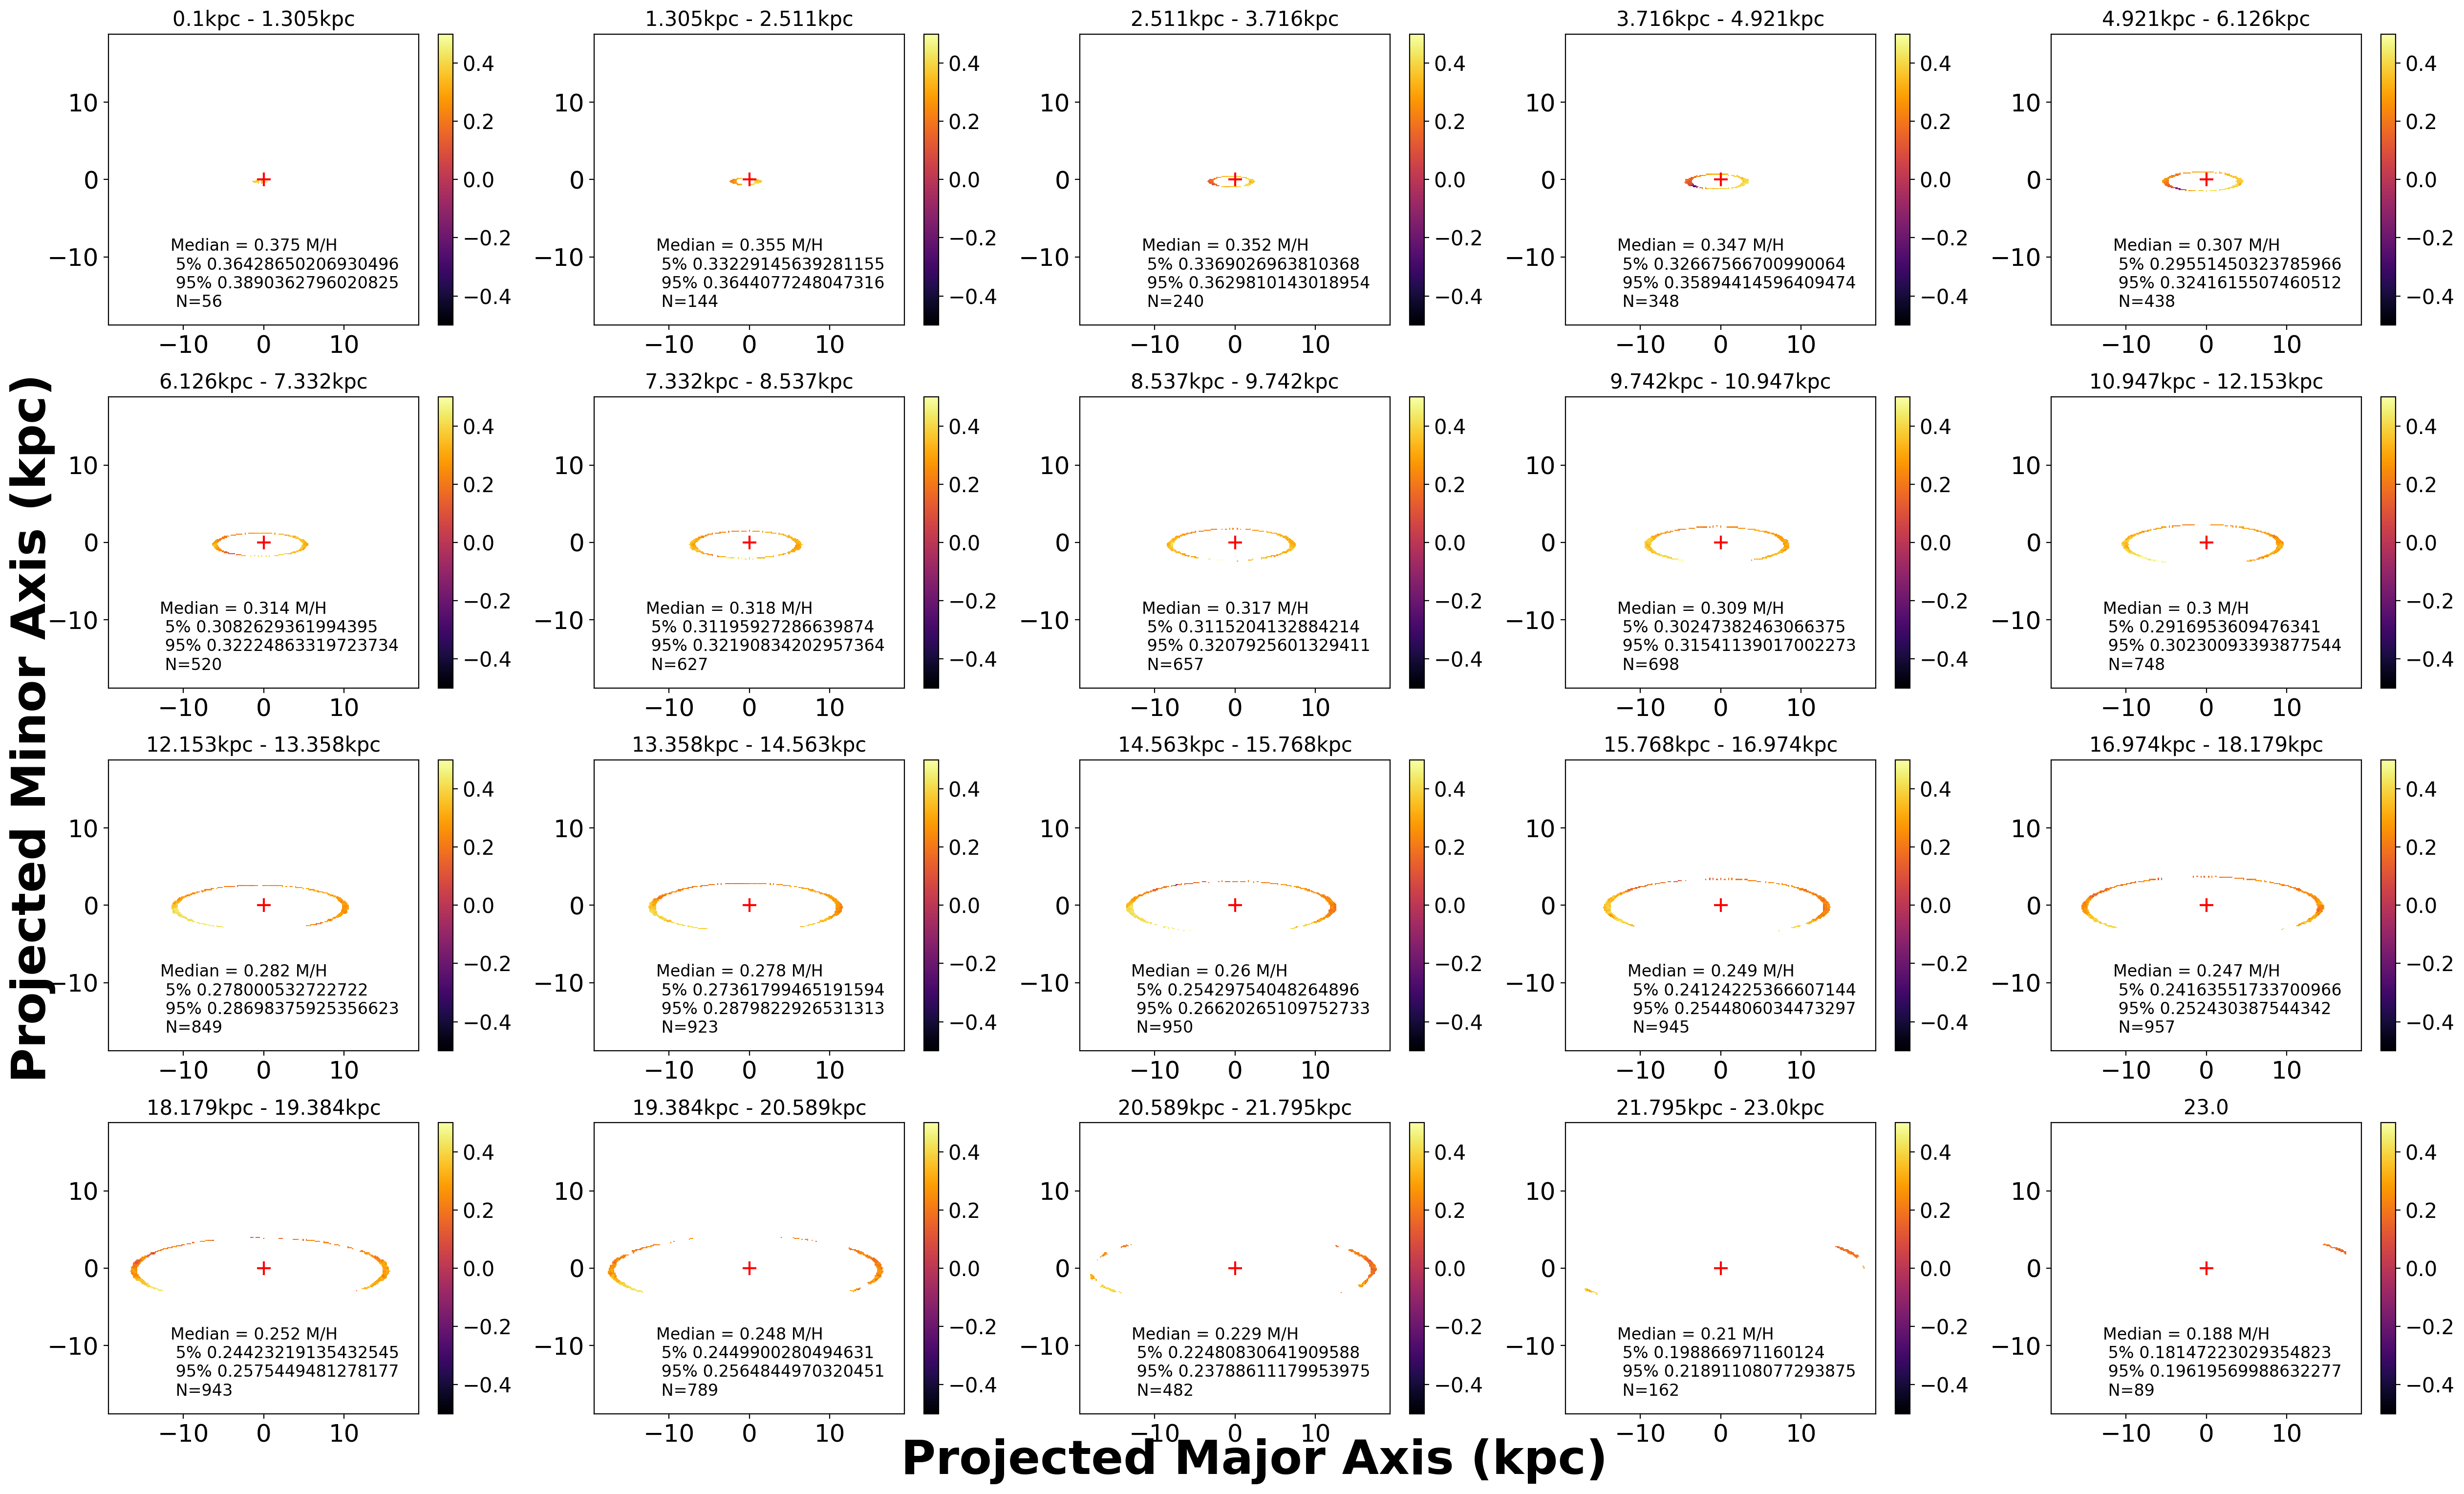

In [429]:
with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
    mh_map = hdu['INTERPOLATED_MH'].data
    draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
    max_dust_mass_value = 2e5
    # Mask the high dust mass areas
    mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
    mh_map_no_dust = mh_map_no_dust.filled()

    # The excluded dust mass values
    excluded_dust_mass_map = mh_map[draine_dust_mass_map >= max_dust_mass_value]

    # mh_map_no_dust = apply_mask_to_map(hdu, 'INTERPOLATED_MH', mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=3e5)

# Define the inner and outer radii
# center_x, center_y = 84, 81 #? These values are more in the center than the WCS center pixels?
center_x, center_y = 95, 100 #? These values are more in the center than the WCS center pixels?


# center_x, center_y = center_x_pix, center_y_pix
semi_major_axis, semi_minor_axis = 16.5, 60
# semi_major_axis, semi_minor_axis = 16.5/3, 60/3
# i = np.arccos(semi_major_axis/semi_minor_axis)
# inner_radius, outer_radius = 0.0, 3.0
inner_radius, outer_radius = 0.1, 23 # radius of ellip in pixels
# inner_radius, outer_radius = 0.1, 50 # radius of ellip in pixels

# angle = np.deg2rad(i)  # Angle in radians
angle = np.deg2rad(-45)  # Angle in radians

# runs = np.linspace(inner_radius, outer_radius, 15)
runs = np.linspace(inner_radius*scale_kpc_per_pix, outer_radius*scale_kpc_per_pix, 20)
delta_runs = runs[1]-runs[0]
num_runs = len(runs)

# Calculate the number of rows and columns for the subplots
cols = 5  # You can change this to fit your needs
rows = math.ceil(num_runs / cols)
fig, axs = plt.subplots(rows, cols, figsize=(25, 15), dpi=200)  # Adjust the figure size as needed
axs = axs.ravel()  # Flatten the array of axes

ellip_nodust_median_list = []
ellip_nodust_qlow_list = []
ellip_nodust_qhigh_list = []
for idx, i in enumerate(runs):
    mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map.shape, i, i+delta_runs)
    mh_map_masked = np.where(mask, mh_map, np.nan)

    # Exclude dust mass value
    # mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map_no_dust.shape, i, i+delta_runs)
    # mh_map_masked = np.where(mask, mh_map_no_dust, np.nan)

    # Rotate the mh_map
    mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)

    # Calculate the maximum extent from the center in both directions
    max_extent_x = max(center_x, mh_map_rotated.shape[1] - center_x) * scale_kpc_per_pix
    max_extent_y = max(center_y, mh_map_rotated.shape[0] - center_y) * scale_kpc_per_pix
    
    # Calculate the coordinates of the x and y axes in kpc/pix
    y_coords = np.arange(mh_map_rotated.shape[0]) * scale_kpc_per_pix
    x_coords = np.arange(mh_map_rotated.shape[1]) * scale_kpc_per_pix

    im0 = axs[idx].imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5, extent=[-max_extent_x, max_extent_x, -max_extent_y, max_extent_y])
    fig.colorbar(im0, ax=axs[idx]).ax.tick_params(labelsize=15)
    if i == runs.max():
        axs[idx].set_title(f'{np.round(runs.max()/scale_kpc_per_pix, 3)}', fontsize=15)
    else:
        axs[idx].set_title(f'{np.round(i/scale_kpc_per_pix, 3)}kpc - {np.round((i+delta_runs)/scale_kpc_per_pix, 3)}kpc', fontsize=15)

    # calculate the median and 5% and 95% convidence intervals
    ellip_median = np.round(np.nanmedian(mh_map_masked), 3)
    # ellip_low = np.round(np.nanpercentile(mh_map_masked, 5), 3)
    # ellip_high = np.round(np.nanpercentile(mh_map_masked, 95), 3)

    # bootstrapping to get interval confidence
    data_filtered = mh_map_rotated[~np.isnan(mh_map_rotated)].flatten()
    bootstrap_results = bootstrap(data=(data_filtered,), statistic=np.nanmedian, n_resamples=9999, method='percentile', confidence_level=0.95, random_state=42)
    ellip_low = bootstrap_results.confidence_interval.low
    ellip_high = bootstrap_results.confidence_interval.high

    # Create a Patch as a proxy artist for the legend
    median_patch = mpatches.Patch(color='none', label=f'Median = {ellip_median} M/H \n 5% {ellip_low} \n 95% {ellip_high} \n N={np.count_nonzero(~np.isnan(mh_map_masked))}')
    axs[idx].legend(handles=[median_patch], loc='lower right', frameon=False, fontsize=12)
    # axs[idx].hlines(134, 0, 300, color='black')

    ellip_nodust_median_list.append(ellip_median)
    ellip_nodust_qlow_list.append(ellip_low)
    ellip_nodust_qhigh_list.append(ellip_high)

    # axs[idx].scatter(center_x_pix, center_y_pix, color='red', s=10, marker='x')
    axs[idx].scatter(0, 0, marker='+', color='red', s=100)
    axs[idx].tick_params(axis='both', which='major', labelsize=18)  # Adjust 'labelsize' as needed
    axs[idx].tick_params(axis='both', which='minor', labelsize=15)


# Remove unused subplots
for idx in range(num_runs, rows*cols):
    fig.delaxes(axs[idx])

# Set a common x and y label for all subplots
fig.text(0.5, 0.00, 'Projected Major Axis (kpc)', ha='center', va='center', fontsize=35, weight='bold')
fig.text(0.0, 0.5, 'Projected Minor Axis (kpc)', ha='center', va='center', rotation='vertical', fontsize=35, weight='bold')



plt.tight_layout()
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/MH_nodust_gradient_ellipse.jpeg')
plt.show()

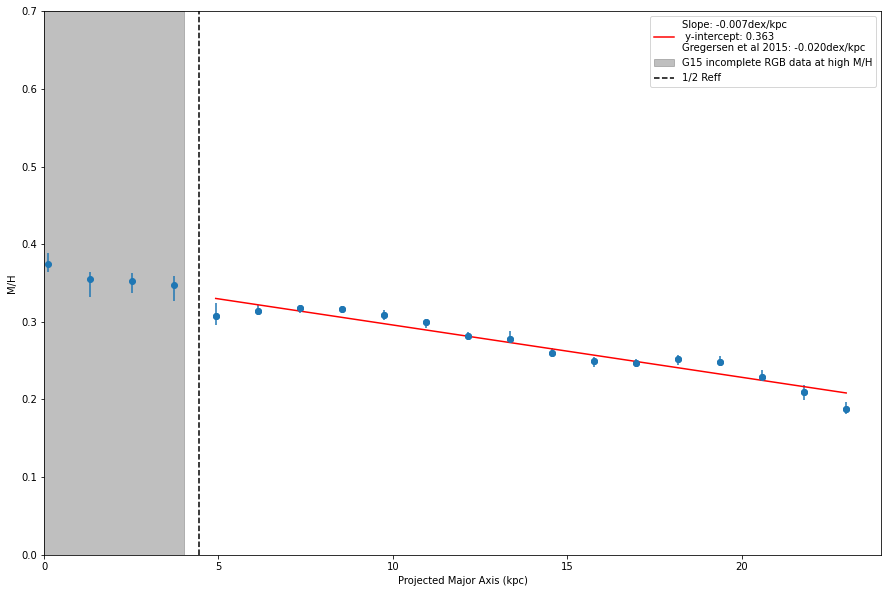

In [421]:
import numpy as np
fig, axs = plt.subplots(1, 1, figsize=(15, 10))  # Adjust the figure size as needed

plt.scatter(runs[4:]/scale_kpc_per_pix, ellip_nodust_median_list[4:])
ellip_nodust_median_array = np.array(ellip_nodust_median_list)
ellip_nodust_qlow_array = np.array(ellip_nodust_qlow_list)
ellip_nodust_qhigh_array = np.array(ellip_nodust_qhigh_list)
plt.errorbar(runs/scale_kpc_per_pix, ellip_nodust_median_list, yerr=(ellip_nodust_median_array - ellip_nodust_qlow_array, ellip_nodust_qhigh_array - ellip_nodust_median_array), fmt='o')
plt.xlabel('')

# Fit a linear regression line
slope, intercept = np.polyfit(runs[4:]/scale_kpc_per_pix, ellip_nodust_median_list[4:], 1)
fit_line = slope * runs[4:]/scale_kpc_per_pix + intercept
plt.plot(runs[4:]/scale_kpc_per_pix, fit_line, color='red', label=f'Slope: {np.round(slope, 3)}dex/kpc \n y-intercept: {np.round(intercept, 3)}\nGregersen et al 2015: -0.020dex/kpc')
# plt.legend()

# Shaded region from 0 to 4.45 kpc (1/2 Reff)
plt.axvspan(0, 4, color='gray', alpha=0.5, label='G15 incomplete RGB data at high M/H') # Gregersen et al 2015 - where completeness become incomplete at high metallicity
plt.vlines(4.45, ymin=0, ymax=1, color='black', linestyle='--', label='1/2 Reff')
plt.ylim(0, 0.7)
plt.xlim(0,24)

plt.xlabel('Projected Major Axis (kpc)')
plt.ylabel('M/H')
plt.legend()

plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_mh_nodust_gradient.jpeg')
plt.show()


## plot the dust and nodust gradients


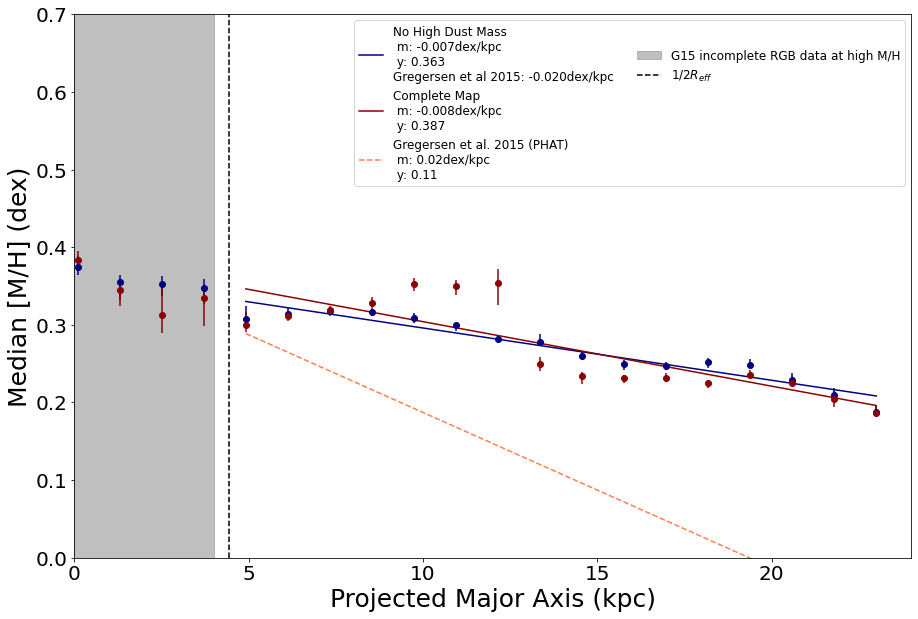

In [422]:
import numpy as np
fig, axs = plt.subplots(1, 1, figsize=(15, 10))  # Adjust the figure size as needed

# without dust
# plt.scatter(runs[4:]/scale_kpc_per_pix, ellip_nodust_median_list[4:], color='navy')
ellip_nodust_median_array = np.array(ellip_nodust_median_list)
ellip_nodust_q25_array = np.array(ellip_nodust_qlow_list)
ellip_nodust_q75_array = np.array(ellip_nodust_qhigh_list)
plt.errorbar(runs/scale_kpc_per_pix, ellip_nodust_median_list, yerr=(ellip_nodust_median_array - ellip_nodust_q25_array, ellip_nodust_q75_array - ellip_nodust_median_array), fmt='o', color='navy')
# Fit a linear regression line
slope_nodust, intercept_nodust = np.polyfit(runs[4:]/scale_kpc_per_pix, ellip_nodust_median_list[4:], 1)
fit_line_no_dust = slope_nodust * runs[4:]/scale_kpc_per_pix + intercept_nodust
plt.plot(runs[4:]/scale_kpc_per_pix, fit_line_no_dust, color='navy', label=f'No High Dust Mass \n m: {np.round(slope_nodust, 3)}dex/kpc \n y: {np.round(intercept_nodust, 3)}\nGregersen et al 2015: -0.020dex/kpc')


# With dust
# plt.scatter(runs[4:]/scale_kpc_per_pix, ellip_median_list[4:], color='darkred')
ellip_median_array = np.array(ellip_median_list)
ellip_q25_array = np.array(ellip_qlow_list)
ellip_q75_array = np.array(ellip_qhigh_list)
plt.errorbar(runs/scale_kpc_per_pix, ellip_median_list, yerr=(ellip_median_array - ellip_q25_array, ellip_q75_array - ellip_median_array), fmt='o', color='darkred')
# Fit a linear regression line
slope, intercept = np.polyfit(runs[4:]/scale_kpc_per_pix, ellip_median_list[4:], 1)
fit_line = slope * runs[4:]/scale_kpc_per_pix + intercept
plt.plot(runs[4:]/scale_kpc_per_pix, fit_line, color='darkred', label=f'Complete Map\n m: {np.round(slope, 3)}dex/kpc \n y: {np.round(intercept, 3)}')


# Gregersen line
g15_phat_fit_line = -0.02 * runs[4:]/scale_kpc_per_pix + intercept # slope = 0.02 dex/kpc - section 4.1 in Gregersen et al 2018
plt.plot(runs[4:]/scale_kpc_per_pix, g15_phat_fit_line, color='coral', label=f'Gregersen et al. 2015 (PHAT)\n m: {np.round(0.02, 3)}dex/kpc \n y: {np.round(0.11, 3)}', linestyle='--')


# Shaded region from 0 to 4.45 kpc (1/2 Reff)
plt.axvspan(0, 4, color='gray', alpha=0.5, label='G15 incomplete RGB data at high M/H') # Gregersen et al 2018 - where completeness become incomplete at high metallicity
plt.vlines(4.45, ymin=0, ymax=1, color='black', linestyle='--', label=r'$1/2 R_{eff}$')
plt.ylim(0, 0.7)
plt.xlim(0,24)
plt.xlabel('Projected Major Axis (kpc)', fontsize='25')
plt.ylabel('Median [M/H] (dex)', fontsize='25')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20') 
plt.legend(fontsize='12', ncols=2)

plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_mh_gradient.jpeg')
plt.show()


In [418]:
x_coords.min(), x_coords.max()

(0.0, 28.944411075819282)

In [419]:
# Try this
# class photutils.aperture.EllipticalAperture(positions, a, b, theta=0.0)
mh_map.shape


(209, 193)

In [340]:
mh_map[:,0].shape

(209,)

### Attempt to use Elliptical aperture from photutils.aperture

Has nan values


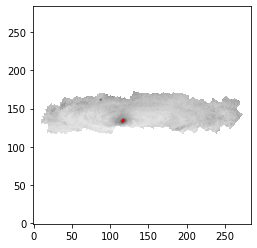

In [341]:
with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
    mh_map = hdu['INTERPOLATED_MH'].data
    # mh_map_masked = np.where(mask, mh_map, np.nan)
    mh_map_rotated = rotate(mh_map, 45, reshape=True, mode='constant', cval=np.nan, order=0)
    # mh_map = np.nan_to_num(mh_map, nan=0)

    if np.isnan(mh_map).any():
        print('Has nan values')


    aperture = EllipticalAperture((117, 134), a=1, b=0.275, theta=np.deg2rad(90)) 
    
    # Plot the data and the aperture
    plt.imshow(mh_map_rotated, origin='lower', cmap='Greys_r')
    aperture.plot(color='red', lw=2)
    plt.show()